In [1]:
import matplotlib.pyplot as plt
import os

In [2]:
from glob import glob
from collections import defaultdict
from pprint import pprint
def parse_rock4(run_name):
    steps, intra_s, eps, code = run_name.split('_')
    nfe = int(steps) + 2
    intra_s = int(intra_s)
    eps = float(eps)
    code = str(code)
    return nfe, intra_s, eps, code


def rock4_imid(im_name):
    prefix = im_name.split('.')[0]
    method, imid = prefix.split('-')
    return imid


def diffusers_imid(im_name):
    imid = im_name.split('.')[0]
    return imid



def build_rock4(paths):
    im_stats = defaultdict(lambda: dict(
        im_record = [],
    ))
    for path in paths:
        run_name = os.path.basename(path)
        nfe, intra_s, eps, code = parse_rock4(run_name)
        contents = os.listdir(os.path.join(path, 'samples'))
        for content in contents:
            full_path = os.path.join(path, 'samples', content)    
            im_id = rock4_imid(content)
            im_stats[nfe]['im_record'].append(
                (im_id, full_path)
                )
        records = im_stats[nfe]['im_record']
        records = sorted(records, key=lambda x: int(x[0]))
        im_stats[nfe]['im_record'] = [path for _, path in records]
    nfe_sorted = dict()
    my_keys = list(im_stats.keys())
    
    my_keys = sorted(my_keys, key = lambda x: int(x))
    for key in my_keys:
        nfe_sorted[key] = im_stats[key]    
    return nfe_sorted
        

rock4_paths = glob('nips_vis/cifar10/ROCK4/*')

rock4_record = build_rock4(rock4_paths)
pprint(rock4_record)

{10: {'im_record': ['nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-0.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-1.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-2.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-3.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-4.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-5.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-6.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-7.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-8.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-9.png',
                    'nips_vis/cifar10/ROCK4/8_50_1e-6_final-tweedie/samples/ROCK4-10.png',
         

In [3]:
from torchvision.utils import make_grid
from PIL import Image
from torchvision import transforms
import torch
def visualize_rock4(im_stats, nfes, im_size=32, square_factor=5):
    for nfe in nfes:
        assert nfe in im_stats, f"nfe {nfe} not in im_stats"
    fontsize = 20
    num_total = len(im_stats[nfes[0]]['im_record'])
    num_use = square_factor * square_factor
    assert num_use <= num_total, f"num_use {num_use} is larger than total {num_total}"
    def load_image(path):
        transfrom = transforms.Compose([
            transforms.Resize((im_size, im_size)),
            transforms.ToTensor(),
        ])
        im = Image.open(path)
        im = im.convert('RGB')
        im = transfrom(im)
        return im
    records = {
        key : torch.stack([load_image(im_path) for im_path in val['im_record'][:num_use]]) for key, val in im_stats.items()
    }
    my_keys = nfes
    fig, axs = plt.subplots(1, len(my_keys), figsize=(20, 20))
    for i, nfe in enumerate(my_keys):
        axs[i].imshow(make_grid(records[nfe], nrow=square_factor).permute(1, 2, 0).numpy())
        axs[i].set_title(f'NFE = {nfe}', fontsize=fontsize)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()
    return fig, axs

#square_factor = 4
#fig, axes = visualize_rock4(rock4_record, nfes=[10, 20, 50, 100], im_size=32, square_factor=square_factor)
#fig.savefig('rock4_cifar10.pdf', bbox_inches='tight')

In [4]:
dpm_paths = glob('nips_vis/cifar10/DPM-Solver++/*')
def build_diffusers(paths):
    im_stats = defaultdict(lambda: dict(
        im_record = [],
    ))
    for path in paths:
        run_name = os.path.basename(path)
        nfe = int(run_name)
        contents = os.listdir(os.path.join(path, 'samples'))
        for content in contents:
            full_path = os.path.join(path, 'samples', content)    
            im_id = diffusers_imid(content)
            im_stats[nfe]['im_record'].append(
                (im_id, full_path)
                )
        records = im_stats[nfe]['im_record']
        records = sorted(records, key=lambda x: int(x[0]))
        im_stats[nfe]['im_record'] = [path for _, path in records]
    nfe_sorted = dict()
    my_keys = list(im_stats.keys())
    
    my_keys = sorted(my_keys, key = lambda x: int(x))
    for key in my_keys:
        nfe_sorted[key] = im_stats[key]    
    return nfe_sorted

dpm_record = build_diffusers(dpm_paths)
pprint(dpm_record)

{10: {'im_record': ['nips_vis/cifar10/DPM-Solver++/10/samples/0.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/1.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/2.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/3.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/4.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/5.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/6.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/7.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/8.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/9.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/10.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/11.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/12.png',
                    'nips_vis/cifar10/DPM-Solver++/10/samples/13.png',
                

In [5]:
#fig, axes = visualize_rock4(dpm_record, nfes=[10, 20, 50, 100], im_size=32, square_factor=square_factor)
#fig.savefig('dpm_cifar10.pdf', bbox_inches='tight')

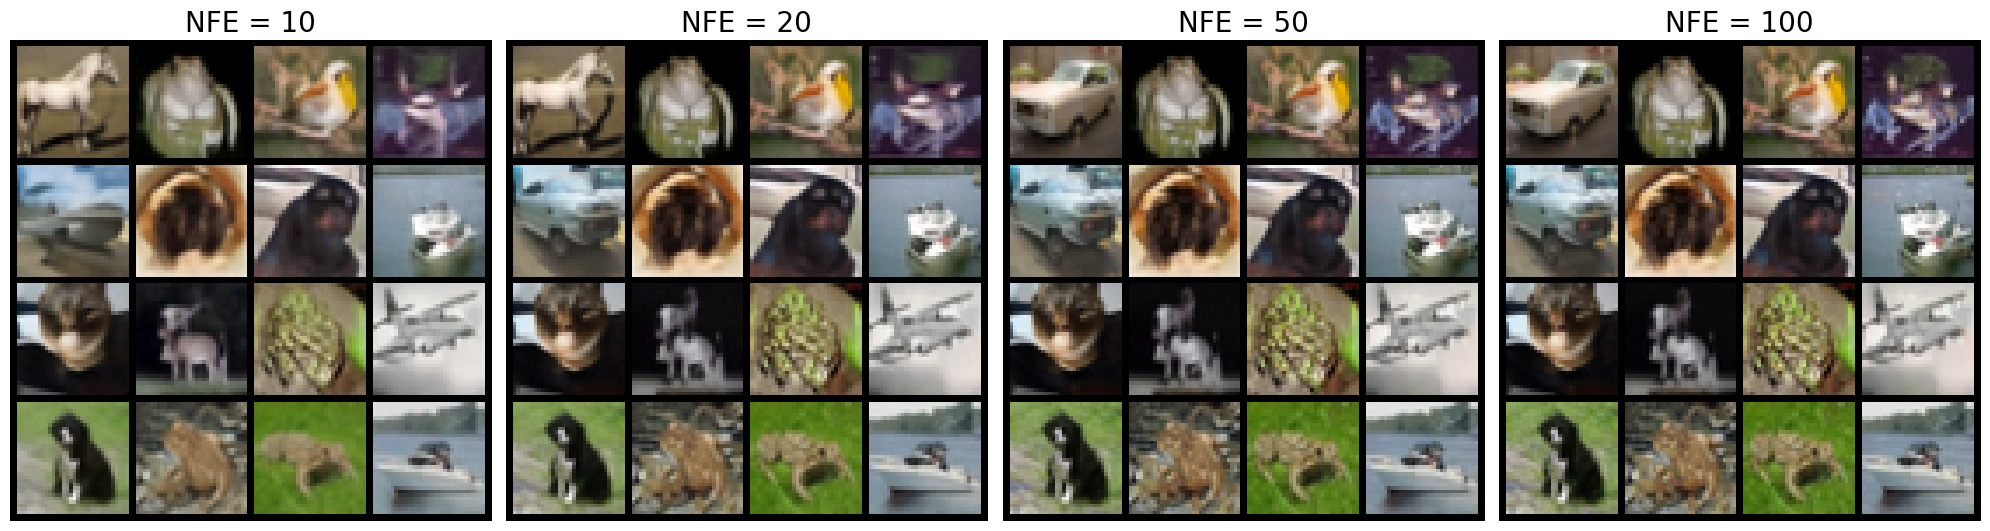

vis_rock4-cifar10/rock4-cifar10_10.pdf saved
vis_rock4-cifar10/rock4-cifar10_20.pdf saved
vis_rock4-cifar10/rock4-cifar10_50.pdf saved
vis_rock4-cifar10/rock4-cifar10_100.pdf saved


In [6]:
from torchvision.utils import make_grid
from PIL import Image
from torchvision import transforms
import torch
def save_imgrids(im_stats, nfes, im_size=32, square_factor=5):
    for nfe in nfes:
        assert nfe in im_stats, f"nfe {nfe} not in im_stats"
    fontsize = 20
    num_total = len(im_stats[nfes[0]]['im_record'])
    num_use = square_factor * square_factor
    assert num_use <= num_total, f"num_use {num_use} is larger than total {num_total}"
    def load_image(path):
        transfrom = transforms.Compose([
            transforms.Resize((im_size, im_size)),
            transforms.ToTensor(),
        ])
        im = Image.open(path)
        im = im.convert('RGB')
        im = transfrom(im)
        return im
    records = {
        key : torch.stack([load_image(im_path) for im_path in val['im_record'][:num_use]]) for key, val in im_stats.items()
    }
    my_keys = nfes
    fig, axs = plt.subplots(1, len(my_keys), figsize=(20, 20))
    mapping = dict()
    for i, nfe in enumerate(my_keys):
        grid_np = make_grid(records[nfe], nrow=square_factor).permute(1, 2, 0).numpy()
        mapping[nfe] = grid_np
        axs[i].imshow(grid_np)
        axs[i].set_title(f'NFE = {nfe}', fontsize=fontsize)
        axs[i].axis('off')
    plt.tight_layout()
    plt.show()
    return fig, axs, mapping

square_factor = 4
fig, axes, mapping = save_imgrids(rock4_record, nfes=[10, 20, 50, 100], im_size=32, square_factor=square_factor)
folder = 'vis_rock4-cifar10'
name = 'rock4-cifar10'
if not os.path.exists(folder):
    os.makedirs(folder)
for nfe, grid_np in mapping.items():
    grid_im = Image.fromarray((grid_np * 255).astype('uint8'))
    grid_im.save(f'{folder}/{name}_{nfe}.pdf', 'PDF')
    print(f'{folder}/{name}_{nfe}.pdf saved')

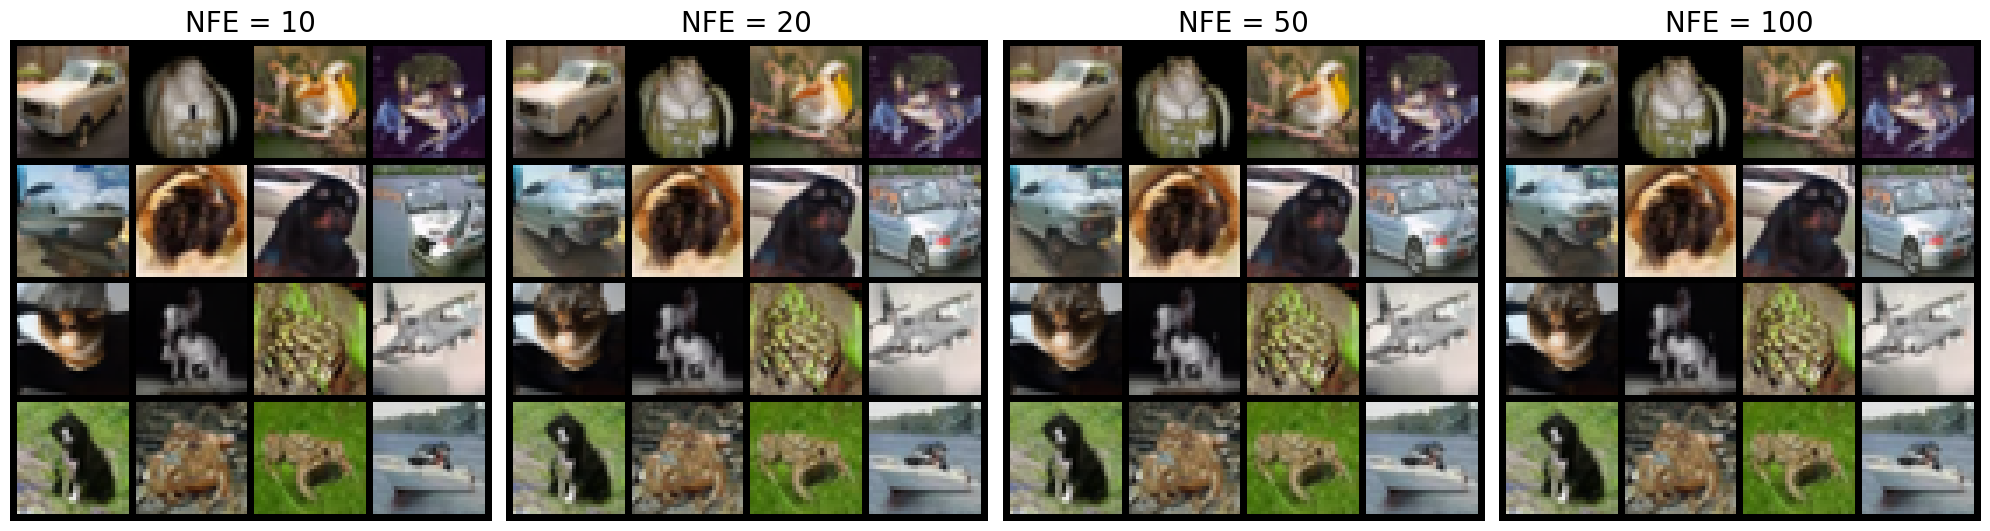

vis_dpm-cifar10/dpm-cifar10_10.pdf saved
vis_dpm-cifar10/dpm-cifar10_20.pdf saved
vis_dpm-cifar10/dpm-cifar10_50.pdf saved
vis_dpm-cifar10/dpm-cifar10_100.pdf saved


In [7]:
square_factor = 4
fig, axes, mapping = save_imgrids(dpm_record, nfes=[10, 20, 50, 100], im_size=32, square_factor=square_factor)
folder = 'vis_dpm-cifar10'
name = 'dpm-cifar10'
if not os.path.exists(folder):
    os.makedirs(folder)
for nfe, grid_np in mapping.items():
    grid_im = Image.fromarray((grid_np * 255).astype('uint8'))
    grid_im.save(f'{folder}/{name}_{nfe}.pdf', 'PDF')
    print(f'{folder}/{name}_{nfe}.pdf saved')